In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

In [2]:
class VelocityStuff:
    
    
    def __init__(self):
        
        """Initiate the class."""
        
        self.data = []

        
    def find_star_COM(self, radius_limit, star_mass_array, x, y, z):
        
        """This function finds the positions in x, y and z of the center of mass of the stars.
        
        Inputs:
        1) radius_limit: the radius that encompasses all the stellar mass we want to consider (in pc)
        2) star_mass_array: an array from raw data that has all the stars in the system & their masses (in Msun)
        3) x: the x component of all the stars' positions (in pc)
        4) y: the y component of all the stars' positions (in pc)
        5) z: the z component of all the stars' positions (in pc)
        
        Outputs: values for the positions of the stellar COM in x, y and z (in pc)"""
        
        r = np.sqrt(x**2 + y**2 + z**2)
        COM_x = np.sum(x[r<radius_limit] * star_mass_array[r<radius_limit]) / np.sum(star_mass_array[r<radius_limit])
        COM_y = np.sum(y[r<radius_limit] * star_mass_array[r<radius_limit]) / np.sum(star_mass_array[r<radius_limit])
        COM_z = np.sum(z[r<radius_limit] * star_mass_array[r<radius_limit]) / np.sum(star_mass_array[r<radius_limit])
        return COM_x, COM_y, COM_z
    
    
    def find_star_vCOM(self, radius_limit, star_mass_array, vx, vy, vz, x, y, z):
        
        """This function finds the positions in x, y and z of the center of mass of the stars.
        
        Inputs:
        1) radius_limit: the radius that encompasses all the stellar mass we want to consider (in pc)
        2) star_mass_array: an array from raw data that has all the stars in the system & their masses (in Msun)
        3) vx: the x component of all the stars' velocities (in km/s)
        4) vy: the y component of all the stars' velocities (in km/s)
        5) vz: the z component of all the stars' velocities (in km/s)
        6) x: the x component of all the stars' positions (in pc)
        7) y: the y component of all the stars' positions (in pc)
        8) z: the z component of all the stars' positions (in pc)  
        
        Outputs: values for the velocities of the stellar COM in x, y and z (in km/s)"""
        
        r = np.sqrt(x**2 + y**2 + z**2)
        COM_vx = np.sum(vx[r<radius_limit] * star_mass_array[r<radius_limit]) / np.sum(star_mass_array[r<radius_limit])
        COM_vy = np.sum(vy[r<radius_limit] * star_mass_array[r<radius_limit]) / np.sum(star_mass_array[r<radius_limit])
        COM_vz = np.sum(vz[r<radius_limit] * star_mass_array[r<radius_limit]) / np.sum(star_mass_array[r<radius_limit])
        return COM_vx, COM_vy, COM_vz
        
    
    def star_mass_analysis(self, bin_size, radius_array, star_distance, star_mass_array):
        
        """This function computes the stellar mass profile.
        
        Inputs:
        1) bin_size: the resolution of the simulation (in kpc)
        2) radius_array: an array of radii (in kpc) generated for the analysis. 
        The mass profile is basically the mass enclosed within each value of radius in this array.
        3) star_distance: the magnitude of the star's positions (in kpc) based on the data file.
        Calculated as star_distance = np.sqrt(x**2 + y**2 + z**2)
        4) star_mass_array: an array from the raw data that has all the stars in the system & their masses (in Msun)
        
        Outputs: the stellar mass profile (in Msun), the total mass enclosed (in Msun), the stellar half-mass (in Msun)
        and the stellar half-radius (in kpc)"""
        
        mass_prof_stars = np.zeros(np.size(radius_array))
        h = 0
        for radius_value in radius_array:
            particles = np.where((star_distance < (radius_value + bin_size)))
            masses_in_here = np.sum(star_mass_array[particles])
            mass_prof_stars[h] = masses_in_here
            h += 1
        
        M_tot = mass_prof_stars[np.size(mass_prof_stars) - 1]
        M_half = (1/2) * M_tot
        closest = (np.abs(mass_prof_stars - M_half)).argmin()
        r_half = radius_array[closest]
        
        return mass_prof_stars, M_tot, M_half, r_half
        
    
    def weighted_stdev(self, velocity, star_mass_array, bin_size, star_distance, radius_array):
        
        """This function computes the weighted velocity dispersion of all the stars in one direction (x, y or z).
        
        Inputs:
        1) velocity: an array from the data file representing the velocities of all the stars (in km/s)
        in a certain direction (x, y or z)
        2) star_mass_array: an array from the raw data that has all the stars in the system & their masses (in Msun)
        3) bin_size: the resolution of the simulation (in kpc)
        4) star_distance: the magnitude of the star's positions (in kpc) based on the data file.
        Calculated as star_distance = np.sqrt(x**2 + y**2 + z**2)
        5) radius_array: an array of radii (in kpc) generated for the analysis.
        
        Outputs: an array of the weighted velocity dispersion in a certain direction (in km/s)"""
                
        u = 0
        stdev = np.zeros(np.size(radius_array))
        
        for radius_value in radius_array:
            where = np.where((star_distance < (radius_value + bin_size)))
            velocity_array = velocity[where]
            enclosed_mass = star_mass_array[where]
            weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
            unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)
            weighted_stdev = np.sqrt(unsquared_weighted_stdev)
            stdev[u] = weighted_stdev
            u += 1

        return stdev
    
    
    def dynamical_mass(self, radius_array, dm_distance, bin_size):
        
        """This function finds the dynamical mass profile of the galaxy, 
        which is just the dark matter mass profile.
        
        Inputs: 
        1) radius_array: an array of radii (in kpc) generated for the analysis.
        2) dm_distance: the magnitude of the dark matter particles' positions (in kpc) based on the data file.
        Calculated as dm_distance = np.sqrt(x**2 + y**2 + z**2)
        3) bin_size: the resolution of the simulation (in kpc)
        
        Outputs: an array for the dark matter mass profile of the galaxy."""
        
        dm_mass_profile = np.zeros(np.size(radius_array))
        h = 0
        for radius in radius_array:
            dm_particles = np.where((dm_distance < (radius + bin_size)))
            how_many_particles = np.size(dm_particles)
            dm_mass_profile[h] = how_many_particles * 500 # 500 Msun is the mass per particle
            h += 1
        
        return dm_mass_profile
    
    
    def Wolf_mass_estimator(self, radius, stdev):
        
        """This function gives an ARRAY of Wolf mass estimates for the stellar half-mass of the galaxy
        depending on the radius and the velocity dispersion at that radius.
        
        Inputs:
        1) radius: the radius at which the Wolf mass estimator is applied (in kpc). 
        Can be a value or an array.
        2) stdev: the corresponding weighted velocity dispersion in a certain direction (in km/s). 
        Can be a value or an array.
        
        Outputs: either one value or one array of Wolf mass estimates."""
        
        G = 4.3009e-3 # pc*(km/s)^2 / Msun
        
        return 3 * (stdev)**2 * (radius*1000) / G
    
    
    def Wolf_mass_at_rhalf(self, velocity, star_mass_array, bin_size, star_distance, dm_distance, radius_array):
        
        """This function gives a Wolf mass estimate for the stellar half-mass of the galaxy
        given the half-light radius (r_half) and the velocity dispersion at that radius.
        
        Inputs:
        1) velocity: an array from the data file representing the velocities of all the stars (in km/s)
        in a certain direction (x, y or z)
        2) star_mass_array: an array from the raw data that has all the stars in the system & their masses (in Msun)
        3) bin_size: the resolution of the simulation (in kpc)
        4) star_distance: the magnitude of the star's positions (in kpc) based on the data file.
        Calculated as star_distance = np.sqrt(x**2 + y**2 + z**2)
        5) dm_distance: the magnitude of the dark matter particles' positions (in kpc) based on the data file.
        Calculated as dm_distance = np.sqrt(x**2 + y**2 + z**2)
        6) radius_array: an array of radii (in kpc) generated for the analysis.
        
        Outputs: the Wolf mass estimate in the x, y or z direction (in Msun)"""
        
        # First, find the dynamical mass profile of the galaxy, which is just the dark matter mass profile.
        
        dm_mass_profile = self.dynamical_mass(radius_array, dm_distance, bin_size)
        
        # Next, this finds the Wolf mass estimator and takes the ratio of that over the dynamical mass at r_half.
        
        G = 4.3009e-3 # pc*(km/s)^2 / Msun

        mass_prof_stars, M_tot, M_half, r_half = self.star_mass_analysis(bin_size, \
                                                                         radius_array, star_distance, star_mass_array)
        stdev = self.weighted_stdev(velocity, star_mass_array, bin_size, star_distance, radius_array)
        closest = (np.abs(mass_prof_stars - M_half)).argmin()        
        stdev_at_rhalf = stdev[closest]
        M_real = dm_mass_profile[closest]
        
        M_wolf = self.Wolf_mass_estimator(stdev_at_rhalf, r_half)
        
        return stdev_at_rhalf, M_real, M_wolf

In [3]:
# initiate the analysis by calling the entire class

analyze = VelocityStuff()

# ====== ANALYZING DWARF 1 WITH RT ======

In [4]:
# importing all the data

dm_290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_dm_5e8_rt_0290.txt")

bin_size = 0.02

dx_dm_290 = dm_290[:,4] / 1000 # converting pc to kpc
dy_dm_290 = dm_290[:,5] / 1000 # converting pc to kpc
dz_dm_290 = dm_290[:,6] / 1000 # converting pc to kpc
r_dm_290 = np.sqrt(dx_dm_290**2 + dy_dm_290**2 + dz_dm_290**2)

vx_dm_COM = np.sum(dm_290[:,7]) / np.size(dm_290[:,7])
vy_dm_COM = np.sum(dm_290[:,8]) / np.size(dm_290[:,8])
vz_dm_COM = np.sum(dm_290[:,9]) / np.size(dm_290[:,9])

radius_array = np.arange(0.01, round(max(r_dm_290), 2), bin_size)

star_290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_star_5e8_rt_0290.txt")
star_mass_290 = star_290[:,11]

## CASE 1: The star positions & velocities are corrected according to the dark matter COM within $r_{vir}$.

In [5]:
# First, correct the stars' position and velocity measurements according to the dark matter COM.
x_star_case1 = star_290[:,4] / 1000
y_star_case1 = star_290[:,5] / 1000
z_star_case1 = star_290[:,6] / 1000
r_star_case1 = np.sqrt(x_star_case1**2 + y_star_case1**2 + z_star_case1**2)

vx_star_dm_vCOM = star_290[:,7] - vx_dm_COM
vy_star_dm_vCOM = star_290[:,8] - vy_dm_COM
vz_star_dm_vCOM = star_290[:,9] - vz_dm_COM

In [6]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof1, M_tot1, M_half1, r_half1 = analyze.star_mass_analysis(bin_size, radius_array, r_star_case1, star_mass_290)

In [7]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x1 = analyze.weighted_stdev(vx_star_dm_vCOM, star_mass_290, bin_size, r_star_case1, radius_array)
stdev_y1 = analyze.weighted_stdev(vy_star_dm_vCOM, star_mass_290, bin_size, r_star_case1, radius_array)
stdev_z1 = analyze.weighted_stdev(vz_star_dm_vCOM, star_mass_290, bin_size, r_star_case1, radius_array)

print('Success!')

Success!


<ipython-input-2-e8092c607b68>:107: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
<ipython-input-2-e8092c607b68>:108: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


In [8]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x1, M_real1, M_wolf_x1 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM, star_mass_290, \
                                              bin_size, r_star_case1, r_dm_290, radius_array)
stdev_at_rhalf_y1, M_real1, M_wolf_y1 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM, star_mass_290, \
                                              bin_size, r_star_case1, r_dm_290, radius_array)
stdev_at_rhalf_z1, M_real1, M_wolf_z1 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM, star_mass_290, \
                                              bin_size, r_star_case1, r_dm_290, radius_array)

<ipython-input-2-e8092c607b68>:107: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
<ipython-input-2-e8092c607b68>:108: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


## CASE 2: The star positions & velocities are corrected according to the stellar COM within $r_{vir}$.

In [9]:
# First, find the stellar COM (both for position and velocity) within r_vir.
COM_x, COM_y, COM_z = analyze.find_star_COM(star_290[:,2][0], star_290[:,11], \
                                            star_290[:,4], star_290[:,5], star_290[:,6])
COM_vx, COM_vy, COM_vz = analyze.find_star_vCOM(star_290[:,2][0], star_mass_290, \
                                                star_290[:,7], star_290[:,8], star_290[:,9], \
                                                star_290[:,4], star_290[:,5], star_290[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_290 = (star_290[:,4] - COM_x) / 1000 # converting pc to kpc
y_star_290 = (star_290[:,5] - COM_y) / 1000 # converting pc to kpc
z_star_290 = (star_290[:,6] - COM_z) / 1000 # converting pc to kpc
r_star_case2 = np.sqrt(x_star_290**2 + y_star_290**2 + z_star_290**2)

vx_star_stel_vCOM = star_290[:,7] - COM_vx
vy_star_stel_vCOM = star_290[:,8] - COM_vy
vz_star_stel_vCOM = star_290[:,9] - COM_vz
v_star_case2 = np.sqrt(vx_star_stel_vCOM**2 + vy_star_stel_vCOM**2 + vz_star_stel_vCOM**2)

In [10]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof2, M_tot2, M_half2, r_half2 = analyze.star_mass_analysis(bin_size, radius_array, r_star_case2, star_mass_290)

In [11]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x2 = analyze.weighted_stdev(vx_star_stel_vCOM, star_mass_290, bin_size, r_star_case2, radius_array)
stdev_y2 = analyze.weighted_stdev(vy_star_stel_vCOM, star_mass_290, bin_size, r_star_case2, radius_array)
stdev_z2 = analyze.weighted_stdev(vz_star_stel_vCOM, star_mass_290, bin_size, r_star_case2, radius_array)

print('Success!')

Success!


<ipython-input-2-e8092c607b68>:107: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
<ipython-input-2-e8092c607b68>:108: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


In [12]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x2, M_real2, M_wolf_x2 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM, star_mass_290, \
                                              bin_size, r_star_case2, r_dm_290, radius_array)
stdev_at_rhalf_y2, M_real2, M_wolf_y2 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM, star_mass_290, \
                                              bin_size, r_star_case2, r_dm_290, radius_array)
stdev_at_rhalf_z2, M_real2, M_wolf_z2 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM, star_mass_290, \
                                              bin_size, r_star_case2, r_dm_290, radius_array)

<ipython-input-2-e8092c607b68>:107: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
<ipython-input-2-e8092c607b68>:108: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


## CASE 3: The star positions & velocities are corrected according to the stellar COM within a radius of 500 pc, which is where most stars are concentrated based on the contour plots

In [13]:
# First, find the stellar COM (both for position and velocity) within 500 pc.

COM_x, COM_y, COM_z = analyze.find_star_COM(500, star_mass_290, \
                                            star_290[:,4], star_290[:,5], star_290[:,6])

COM_vx, COM_vy, COM_vz = analyze.find_star_vCOM(500, star_mass_290, \
                                                star_290[:,7], star_290[:,8], star_290[:,9], \
                                                star_290[:,4], star_290[:,5], star_290[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_290 = (star_290[:,4] - COM_x) / 1000 # converting pc to kpc
y_star_290 = (star_290[:,5] - COM_y) / 1000 # converting pc to kpc
z_star_290 = (star_290[:,6] - COM_z) / 1000 # converting pc to kpc
r_star_case3 = np.sqrt(x_star_290**2 + y_star_290**2 + z_star_290**2)

vx_star_500pc = star_290[:,7] - COM_vx
vy_star_500pc = star_290[:,8] - COM_vy
vz_star_500pc = star_290[:,9] - COM_vz
v_star_case3 = np.sqrt(vx_star_500pc**2 + vy_star_500pc**2 + vz_star_500pc**2)

In [14]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof3, M_tot3, M_half3, r_half3 = analyze.star_mass_analysis(bin_size, radius_array, r_star_case3, star_mass_290)

In [15]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x3 = analyze.weighted_stdev(vx_star_500pc, star_mass_290, bin_size, r_star_case3, radius_array)
stdev_y3 = analyze.weighted_stdev(vy_star_500pc, star_mass_290, bin_size, r_star_case3, radius_array)
stdev_z3 = analyze.weighted_stdev(vz_star_500pc, star_mass_290, bin_size, r_star_case3, radius_array)

print('Success!')

Success!


<ipython-input-2-e8092c607b68>:107: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
<ipython-input-2-e8092c607b68>:108: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


In [16]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x3, M_real3, M_wolf_x3 = analyze.Wolf_mass_at_rhalf(vx_star_500pc, star_mass_290, \
                                              bin_size, r_star_case3, r_dm_290, radius_array)
stdev_at_rhalf_y3, M_real3, M_wolf_y3 = analyze.Wolf_mass_at_rhalf(vy_star_500pc, star_mass_290, \
                                              bin_size, r_star_case3, r_dm_290, radius_array)
stdev_at_rhalf_z3, M_real3, M_wolf_z3 = analyze.Wolf_mass_at_rhalf(vz_star_500pc, star_mass_290, \
                                              bin_size, r_star_case3, r_dm_290, radius_array)

<ipython-input-2-e8092c607b68>:107: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
<ipython-input-2-e8092c607b68>:108: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


## CASE 4: The star positions & velocities are corrected according to the stellar COM within a radius of 250 pc

In [17]:
# First, find the stellar COM (both for position and velocity) within 250 pc.

COM_x, COM_y, COM_z = analyze.find_star_COM(250, star_mass_290, \
                                            star_290[:,4], star_290[:,5], star_290[:,6])

COM_vx, COM_vy, COM_vz = analyze.find_star_vCOM(250, star_mass_290, \
                                                star_290[:,7], star_290[:,8], star_290[:,9], \
                                                star_290[:,4], star_290[:,5], star_290[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_290 = (star_290[:,4] - COM_x) / 1000 # converting pc to kpc
y_star_290 = (star_290[:,5] - COM_y) / 1000 # converting pc to kpc
z_star_290 = (star_290[:,6] - COM_z) / 1000 # converting pc to kpc
r_star_case4 = np.sqrt(x_star_290**2 + y_star_290**2 + z_star_290**2)

vx_star_250pc = star_290[:,7] - COM_vx
vy_star_250pc = star_290[:,8] - COM_vy
vz_star_250pc = star_290[:,9] - COM_vz
v_star_case4 = np.sqrt(vx_star_250pc**2 + vy_star_250pc**2 + vz_star_250pc**2)

In [18]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof4, M_tot4, M_half4, r_half4 = analyze.star_mass_analysis(bin_size, radius_array, r_star_case4, star_mass_290)

In [19]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x4 = analyze.weighted_stdev(vx_star_250pc, star_mass_290, bin_size, r_star_case4, radius_array)
stdev_y4 = analyze.weighted_stdev(vy_star_250pc, star_mass_290, bin_size, r_star_case4, radius_array)
stdev_z4 = analyze.weighted_stdev(vz_star_250pc, star_mass_290, bin_size, r_star_case4, radius_array)

print('Success!')

Success!


In [20]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x4, M_real4, M_wolf_x4 = analyze.Wolf_mass_at_rhalf(vx_star_250pc, star_mass_290, \
                                              bin_size, r_star_case4, r_dm_290, radius_array)
stdev_at_rhalf_y4, M_real4, M_wolf_y4 = analyze.Wolf_mass_at_rhalf(vy_star_250pc, star_mass_290, \
                                              bin_size, r_star_case4, r_dm_290, radius_array)
stdev_at_rhalf_z4, M_real4, M_wolf_z4 = analyze.Wolf_mass_at_rhalf(vz_star_250pc, star_mass_290, \
                                              bin_size, r_star_case4, r_dm_290, radius_array)

## All the plotting happens here:

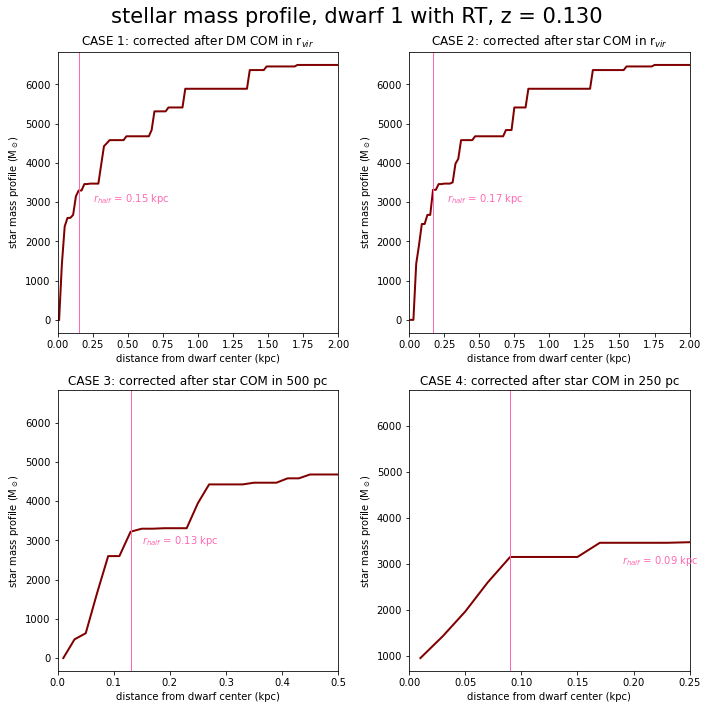

In [21]:
fig, (ax) = plt.subplots(2, 2, figsize=[10, 10])

# Plotting case 1:
ax[0,0].plot(radius_array, mass_prof1, 'maroon', linewidth=2)
ax[0,0].axvline(r_half1, color='hotpink', linewidth=1)
ax[0,0].set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax[0,0].set_xlim([0, 2])
ax[0,0].set_title('CASE 1: corrected after DM COM in r$_{vir}$')
#ax[0,0].axhline(M_tot1, color='blue', linewidth=1)
#ax[0,0].text(0.30, M_tot1 - 400, '''$M_{tot}$ = ''' + str(round(M_tot1, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax[0,0].text(r_half1 + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[0,0].set_box_aspect(1)

# Plotting case 2:
ax[0,1].plot(radius_array, mass_prof2, 'maroon', linewidth=2)
ax[0,1].axvline(r_half2, color='hotpink', linewidth=1)
ax[0,1].set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax[0,1].set_title('CASE 2: corrected after star COM in r$_{vir}$')
ax[0,1].set_xlim([0, 2])
#ax[0,1].axhline(M_tot2, color='blue', linewidth=1)
#ax[0,1].text(0.30, M_tot2 - 400, '''$M_{tot}$ = ''' + str(round(M_tot2, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax[0,1].text(r_half2 + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[0,1].set_box_aspect(1)

# Plotting case 3:
ax[1,0].plot(radius_array, mass_prof3, 'maroon', linewidth=2)
ax[1,0].axvline(r_half3, color='hotpink', linewidth=1)
ax[1,0].set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax[1,0].set_title('CASE 3: corrected after star COM in 500 pc')
ax[1,0].set_xlim([0, 0.5])
#ax[1,0].axhline(M_tot3, color='blue', linewidth=1)
#ax[1,0].text(0.30, M_tot3 - 400, '''$M_{tot}$ = ''' + str(round(M_tot3, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax[1,0].text(r_half3 + 0.02, 2900, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[1,0].set_box_aspect(1)

# Plotting case 4:
ax[1,1].plot(radius_array, mass_prof4, 'maroon', linewidth=2)
ax[1,1].axvline(r_half4, color='hotpink', linewidth=1)
ax[1,1].set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax[1,1].set_xlim([0, 0.25])
ax[1,1].set_title('CASE 4: corrected after star COM in 250 pc')
#ax[1,1].axhline(M_tot4, color='blue', linewidth=1)
#ax[1,1].text(0.30, M_tot4 - 400, '''$M_{tot}$ = ''' + str(round(M_tot4, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax[1,1].text(r_half4 + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half4, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[1,1].set_box_aspect(1)

plt.suptitle('stellar mass profile, dwarf 1 with RT, z = 0.130', fontsize=21)
plt.tight_layout()
plt.show()

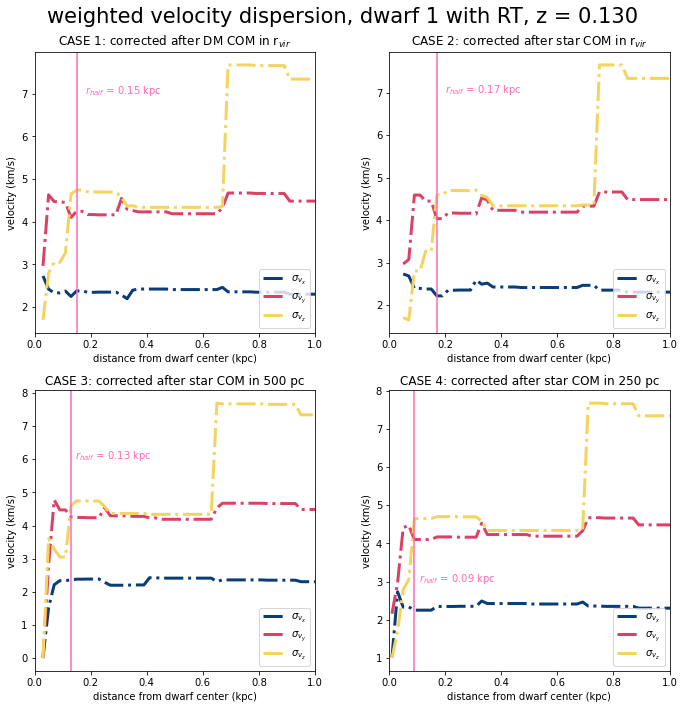

In [22]:
fig, (ax) = plt.subplots(2, 2, figsize=[10, 10])

# Plotting case 1:
ax[0,0].plot(radius_array, stdev_x1, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax[0,0].plot(radius_array, stdev_y1, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax[0,0].plot(radius_array, stdev_z1, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax[0,0].axvline(r_half1, color='hotpink')
ax[0,0].text(r_half1 + 0.03, 7, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[0,0].set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax[0,0].set_xlim([0, 1])
ax[0,0].legend(loc='lower right')
ax[0,0].set_box_aspect(1)
ax[0,0].set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax[0,1].plot(radius_array, stdev_x2, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax[0,1].plot(radius_array, stdev_y2, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax[0,1].plot(radius_array, stdev_z2, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax[0,1].axvline(r_half2, color='hotpink')
ax[0,1].text(r_half2 + 0.03, 7, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[0,1].set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax[0,1].set_xlim([0, 1])
ax[0,1].legend(loc='lower right')
ax[0,1].set_box_aspect(1)
ax[0,1].set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax[1,0].plot(radius_array, stdev_x3, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax[1,0].plot(radius_array, stdev_y3, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax[1,0].plot(radius_array, stdev_z3, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax[1,0].axvline(r_half3, color='hotpink')
ax[1,0].text(r_half3 + 0.015, 6, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[1,0].set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax[1,0].set_xlim([0, 1])
ax[1,0].legend(loc='lower right')
ax[1,0].set_box_aspect(1)
ax[1,0].set_title('CASE 3: corrected after star COM in 500 pc')

# Plotting case 4:
ax[1,1].plot(radius_array, stdev_x4, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax[1,1].plot(radius_array, stdev_y4, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax[1,1].plot(radius_array, stdev_z4, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax[1,1].axvline(r_half4, color='hotpink')
ax[1,1].text(r_half4 + 0.015, 3, '''$r_{half}$ = ''' + str(round(r_half4, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[1,1].set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax[1,1].set_xlim([0, 1])
ax[1,1].legend(loc='lower right')
ax[1,1].set_box_aspect(1)
ax[1,1].set_title('CASE 4: corrected after star COM in 250 pc')

plt.suptitle('weighted velocity dispersion, dwarf 1 with RT, z = 0.130', fontsize=21)
plt.tight_layout()
plt.show()

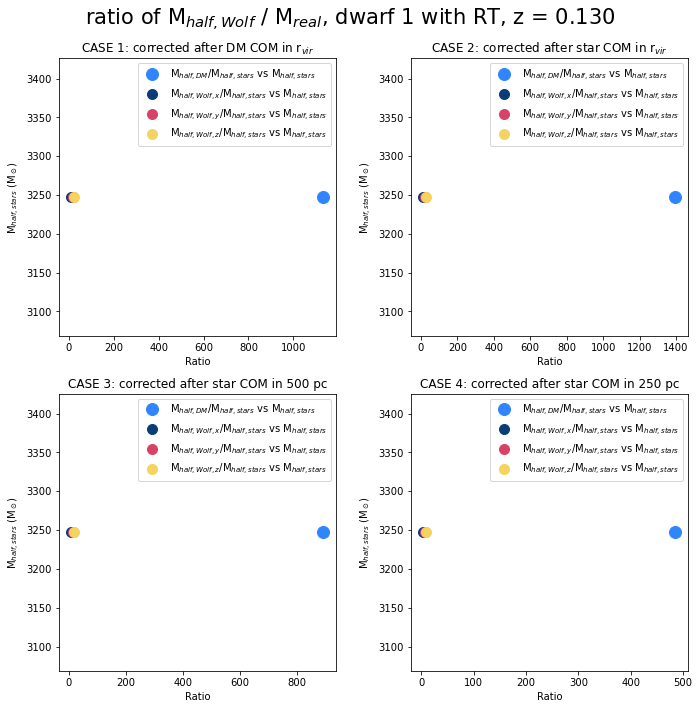

In [23]:
fig, (ax) = plt.subplots(2, 2, figsize=[10, 10])

# Plotting case 1:
ax[0,0].plot(M_real1 / M_half1, M_half1, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,0].plot(M_wolf_x1 / M_half1, M_half1, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,0].plot(M_wolf_y1 / M_half1, M_half1, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,0].plot(M_wolf_z1 / M_half1, M_half1, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,0].set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax[0,0].legend(loc='upper right')
ax[0,0].set_box_aspect(1)
ax[0,0].set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax[0,1].plot(M_real2 / M_half2, M_half2, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,1].plot(M_wolf_x2 / M_half2, M_half2, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,1].plot(M_wolf_y2 / M_half2, M_half2, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,1].plot(M_wolf_z2 / M_half2, M_half2, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[0,1].set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax[0,1].legend(loc='upper right')
ax[0,1].set_box_aspect(1)
ax[0,1].set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax[1,0].plot(M_real3 / M_half3, M_half3, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,0].plot(M_wolf_x3 / M_half3, M_half3, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,0].plot(M_wolf_y3 / M_half3, M_half3, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,0].plot(M_wolf_z3 / M_half3, M_half3, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,0].set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax[1,0].legend(loc='upper right')
ax[1,0].set_box_aspect(1)
ax[1,0].set_title('CASE 3: corrected after star COM in 500 pc')

# Plotting case 4:
ax[1,1].plot(M_real4 / M_half4, M_half4, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,1].plot(M_wolf_x4 / M_half4, M_half4, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,1].plot(M_wolf_y4 / M_half4, M_half4, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,1].plot(M_wolf_z4 / M_half4, M_half4, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax[1,1].set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax[1,1].legend(loc='upper right')
ax[1,1].set_box_aspect(1)
ax[1,1].set_title('CASE 4: corrected after star COM in 250 pc')

plt.suptitle('ratio of M$_{half,Wolf}$ / M$_{real}$, dwarf 1 with RT, z = 0.130', fontsize=21)
plt.tight_layout()
plt.show()

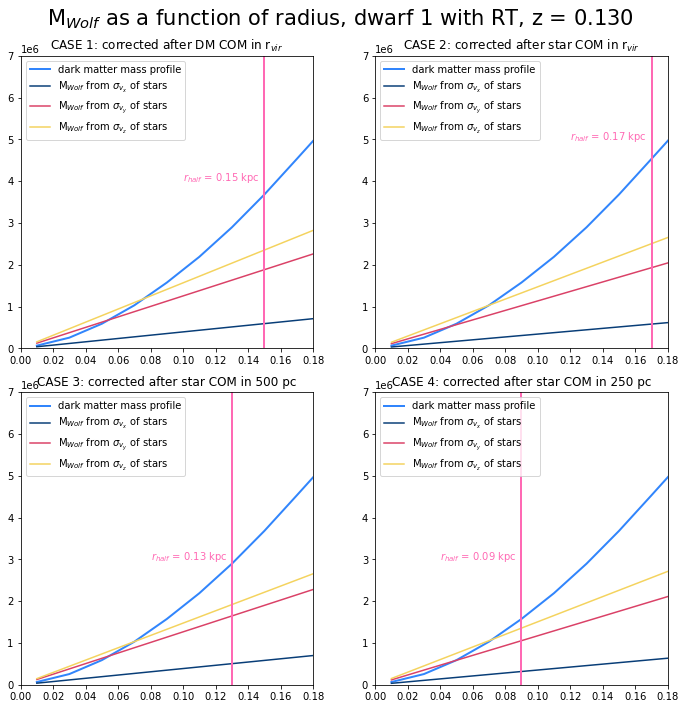

In [30]:
fig, (ax) = plt.subplots(2, 2, figsize=[10, 10])

# Plotting case 1:
ax[0,0].plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_290, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax[0,0].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_x1), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax[0,0].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_y1), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax[0,0].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_z1), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax[0,0].axvline(r_half1, color='hotpink', linewidth=2)
ax[0,0].text(r_half1 - 0.05, 4e6, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[0,0].set_ylim(0,0.7e7)
ax[0,0].set_xlim(0,0.18)
ax[0,0].legend(loc='upper left')
ax[0,0].set_box_aspect(1)
ax[0,0].set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax[0,1].plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_290, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax[0,1].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_x2), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax[0,1].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_y2), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax[0,1].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_z2), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax[0,1].axvline(r_half2, color='hotpink', linewidth=2)
ax[0,1].text(r_half2 - 0.05, 5e6, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[0,1].set_ylim(0,0.7e7)
ax[0,1].set_xlim(0,0.18)
ax[0,1].legend(loc='upper left')
ax[0,1].set_box_aspect(1)
ax[0,1].set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax[1,0].plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_290, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax[1,0].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_x3), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax[1,0].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_y3), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax[1,0].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_z3), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax[1,0].axvline(r_half3, color='hotpink', linewidth=2)
ax[1,0].text(r_half3 - 0.05, 3e6, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[1,0].set_ylim(0,0.7e7)
ax[1,0].set_xlim(0,0.18)
ax[1,0].legend(loc='upper left')
ax[1,0].set_box_aspect(1)
ax[1,0].set_title('CASE 3: corrected after star COM in 500 pc')

# Plotting case 4:
ax[1,1].plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_290, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax[1,1].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_x4), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax[1,1].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_y4), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax[1,1].plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_z4), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax[1,1].axvline(r_half4, color='hotpink', linewidth=2)
ax[1,1].text(r_half4 - 0.05, 3e6, '''$r_{half}$ = ''' + str(round(r_half4, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax[1,1].set_ylim(0,0.7e7)
ax[1,1].set_xlim(0,0.18)
ax[1,1].legend(loc='upper left')
ax[1,1].set_box_aspect(1)
ax[1,1].set_title('CASE 4: corrected after star COM in 250 pc')

plt.suptitle('M$_{Wolf}$ as a function of radius, dwarf 1 with RT, z = 0.130', fontsize=21)
plt.tight_layout()
plt.show()